In [11]:
from __future__ import print_function, division
import numpy as np
from scipy import linalg
from smt.utils import compute_rms_error

from smt.problems import Sphere, NdimRobotArm, Rosenbrock
from smt.sampling_methods import LHS as LHS

In [10]:
# what the absolute **** are these various models O.O
from smt.surrogate_models import LS, QP, KPLS, KRG, KPLSK, GEKPLS, MGP

try:
    from smt.surrogate_models import IDW, RBF, RMTC, RMTB
    compiled_available = True
except:
    compiled_available = False

In [4]:
try:
    import matplotlib.pyplot as plt
    plot_status = True
except:
    plot_status = False

In [5]:
import scipy.interpolate

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [20]:
###################### Initialization of the problem, construction of the training and validation points ######################

nDim = 2

# int(10*nDim)
# ^But why tho
nDoE = 20 

# Function Definition:
function = Rosenbrock(ndim = nDim)

# Construction of the DoE
# "in order to always have the same LHS points, random_state = 1
sampling = LHS(xlimits = function.xlimits, 
               criterion = 'ese', 
               random_state = 1)

xt = sampling(nDoE)

# Compute the outputs
yt = function(xt)

# Validation Points Construction
nTest = 200 # 500 <-- (what does this even mean lol)
sampling = LHS(xlimits = function.xlimits,
             criterion = 'ese',
             random_state = 1)
xTest = sampling(nTest)
yTest = function(xTest)

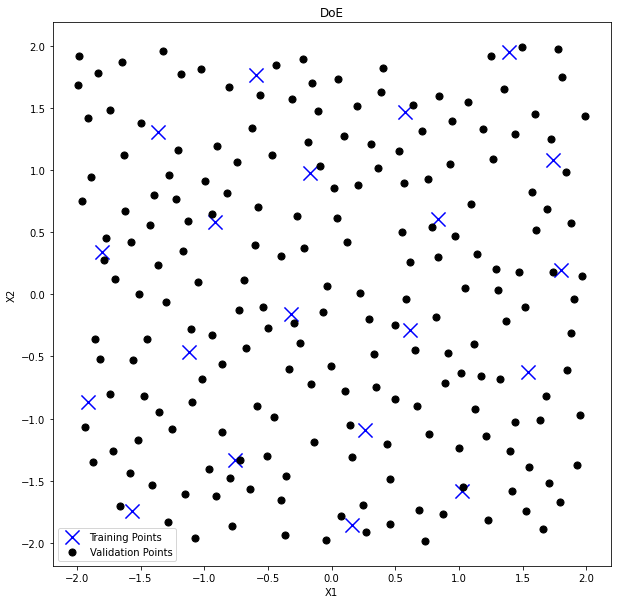

In [22]:
# DoE Visualization

fig = plt.figure(figsize = (10, 10))

plt.scatter(xt[:, 0], 
            xt[:, 1], 
            marker = 'x', 
            c = 'b', 
            s = 200, 
            label = 'Training Points')

plt.scatter(xTest[:, 0],
            xTest[:, 1],
            marker = '.',
            c = 'k',
            s = 200,
            label = 'Validation Points')
            
plt.title('DoE')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


C:\Users\vshlp\AppData\Local\Temp\ipykernel_2604\436404030.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


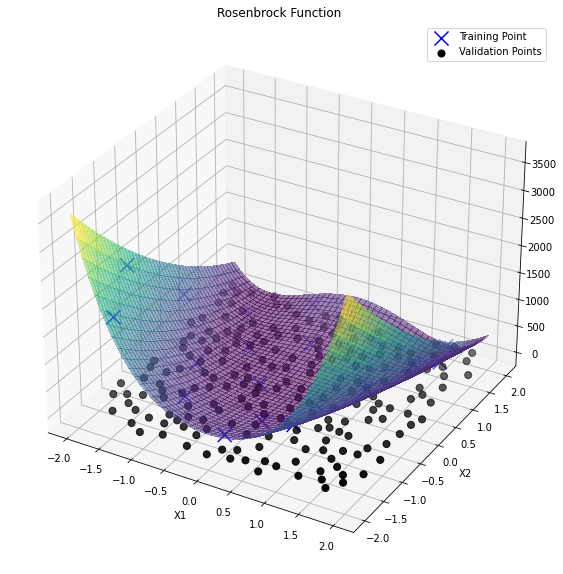

In [27]:
# To Plot the Rosenbrock Function
x = np.linspace(-2, 2, 50)
res = []

for x0 in x:
    for x1 in x:
        res.append(function(np.array([[x0, x1]])))

res = np.array(res)
res = res.reshape((50, 50)).T

X, Y = np.meshgrid(x, x)

fig = plt.figure(figsize = (15, 10))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(X,
                       Y,
                       res,
                       cmap = cm.viridis,
                       linewidth = 0,
                       antialiased = False,
                       alpha = 0.5)

ax.scatter(xt[:, 0],
           xt[:, 1],
           yt,
           zdir = 'z',
           marker = 'x',
           c = 'b',
           s = 200,
           label = 'Training Point')

ax.scatter(xTest[:, 0],
            xTest[:, 1],
            marker = '.',
            c = 'k',
            s = 200,
            label = 'Validation Points')

plt.title('Rosenbrock Function')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()